In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns
mpl.rcParams['axes.titlesize']=14

***
***

# 2.1 Actividad 1

***
>***Generar una señal sinusoidal 2D muestreada. Mostrarla como superficie y como imagen (con la escala de colores correspondiente).***
***


***Primero la muestro como malla y como superficie...***

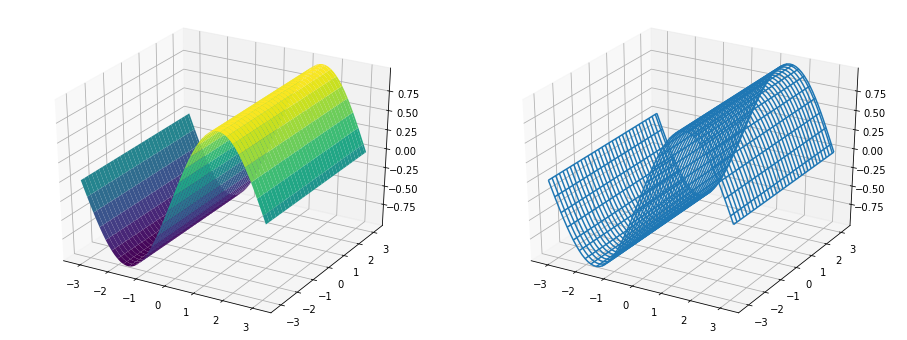

In [2]:
# Armo los vectores/matrices...
step = 0.1
x = np.arange(-np.pi,np.pi+step,step)
y = x.copy()
X, Y = np.meshgrid(x,y)
Z = np.sin(X)

## Con doble for sería...
# Z = np.empty_like(X)
# for i in range(len(x)):
#     for j in range(len(y)):
#         Z[i,j] = np.sin(x[j])

# Grafico...,
fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw={'projection':'3d'}, gridspec_kw={'wspace':0.1})
ax[0].plot_surface(X, Y, Z,cmap='viridis')
ax[1].plot_wireframe(X,Y,Z);

***Como imagen, en escala de grises y con el mapa de color de la superficie usada previamente...***

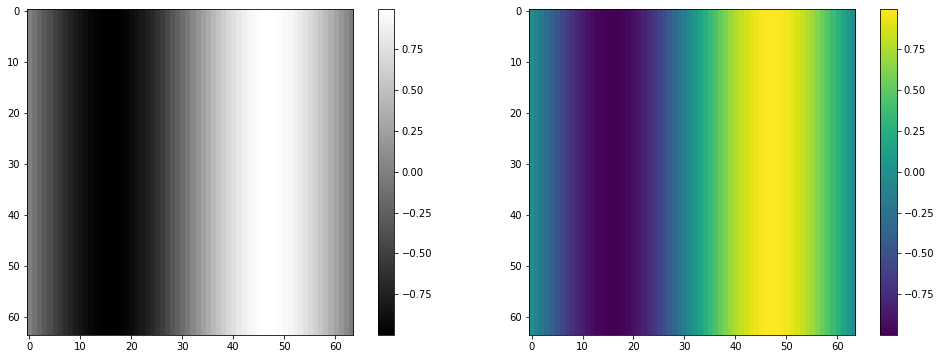

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(18,6), gridspec_kw={'wspace':0})
for axx, cmap in zip(ax, ['gray','viridis']):
    cb = axx.imshow(Z, cmap=cmap)
    fig.colorbar(cb, ax=axx)

***
***
# 2.1 Actividad 2

***
>***Generar una imagen digital con 20 niveles que represente a la función:***
$$
f(x,y)=20e^{- \pi \frac{(x- 128)^2+(y-128)^2}{128}} \quad \quad x,y \in [0,256]
$$
>
>***Luego, representar la función de cuantización y del error de cuantización.***
***
***Primero calculo la función en ese dominio y la grafico como imagen...***

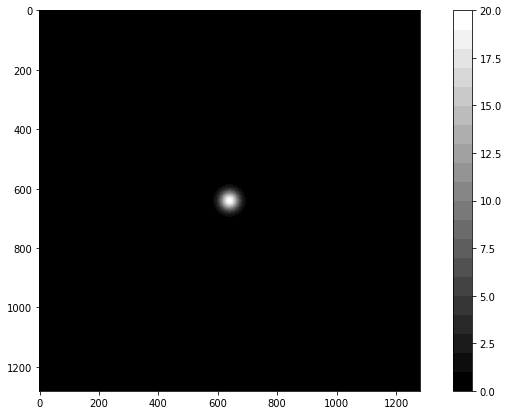

In [4]:
# Armo vectores...
step = 0.2
x = np.arange(0, 256 + step, step)
y = x.copy()
X, Y = np.meshgrid(x, y)
Z = 20*np.exp(-np.pi * ((X-128)**2 + (Y-128)**2) / 128)

# Grafico como imagen con 20 niveles..
n = 20
mi_cmap = mpl.cm.get_cmap('gray', n)
fig, ax = plt.subplots(1, figsize=(12,7))
cb = ax.imshow(Z, cmap=mi_cmap);
fig.colorbar(cb, ax=ax);

***Represento a función de cuantización y su error...***

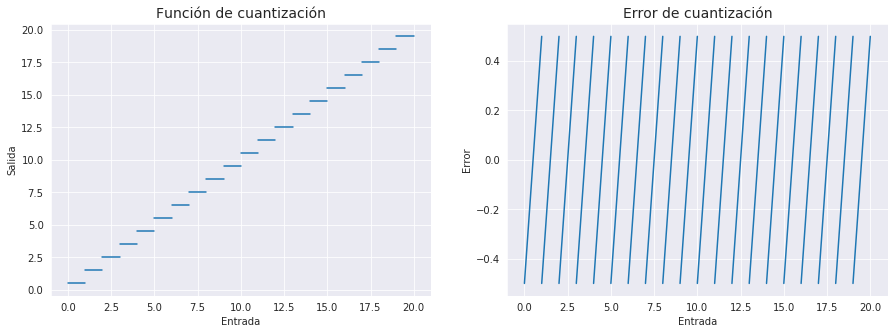

In [5]:
# Armo niveles..
step = (np.max(Z) - np.min(Z))/n
hstep = step/2
lev = np.linspace(np.min(Z) + hstep, np.max(Z) - hstep, n)

# Grafico..
with sns.axes_style('darkgrid'):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    for l in lev:
        stt, stp = l - hstep, l + hstep
        ax[0].plot([stt, stp], [l, l], 'tab:blue')
        ax[1].plot([stt, stp], [-hstep, hstep], 'tab:blue')
    ax[0].set(title='Función de cuantización', xlabel='Entrada', ylabel='Salida')
    ax[1].set(title='Error de cuantización', xlabel='Entrada', ylabel='Error');

***
***
***